<a href="https://colab.research.google.com/github/ghlim40/BT/blob/main/Just_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyupbit
!pip install datetime
!pip install numpy
!pip install pyjwt
!pip install datetime
!pip install schedule
!pip install Prophet

In [8]:
import pyupbit
import datetime
import time, calendar
import numpy as np
import datetime
import schedule
from fbprophet import Prophet

In [25]:
coin = "KRW-BTC" 

In [26]:
df_predict = pyupbit.get_ohlcv(coin,count=5000, interval="minute60")
df_predict

df_predict = df_predict.reset_index()
df_predict['ds'] = df_predict['index']
df_predict['y'] = df_predict['close']
data_predict = df_predict[['ds','y']]
data_predict

,ds,y
0,2021-07-23 01:00:00,38050000.0
1,2021-07-23 02:00:00,38066000.0
2,2021-07-23 03:00:00,37917000.0
3,2021-07-23 04:00:00,38030000.0
4,2021-07-23 05:00:00,37968000.0
...,...,...
4995,2022-02-16 11:00:00,53422000.0
4996,2022-02-16 12:00:00,53269000.0
4997,2022-02-16 13:00:00,53130000.0
4998,2022-02-16 14:00:00,53409000.0


In [27]:
model = Prophet()
model.fit(data_predict)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [28]:
future = model.make_future_dataframe(periods=24, freq='H')
forecast = model.predict(future)

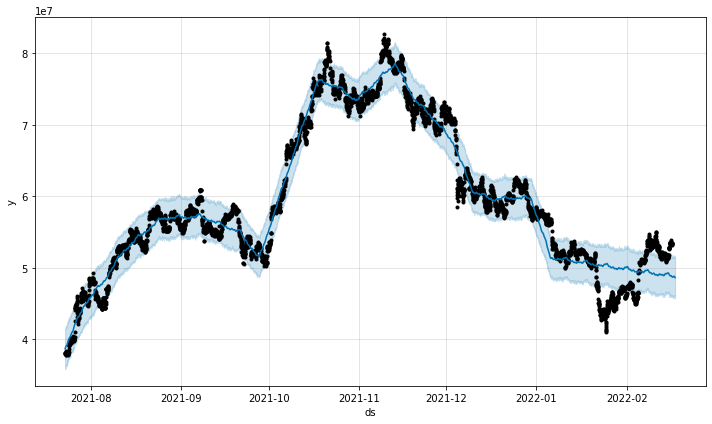

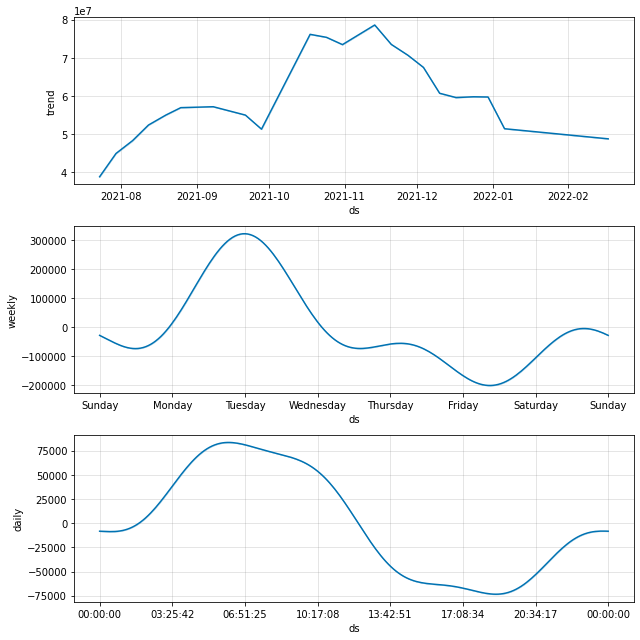

In [29]:
#그래프1
fig1 = model.plot(forecast)
#그래프2
fig2 = model.plot_components(forecast)